In [1]:
import numpy as np
from scipy.linalg import sqrtm
from scipy.linalg import toeplitz, eigvals
import random
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(140)

We begin by motivating why we are interested in studying pseudospectrum.

# Eigenvalues of Noisy Matrices

Suppose we have the following matrix $A$

In [2]:
A = np.array([[0,0,0,1], [1,0,0,0], [0,1,0,0], [0,0,1,0]])
A

array([[0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0]])

This is a special case of the Frobenius companion matrix of the polynomial $f(t)=t^4-1$. By a special property of these matricies, it's charateristic polynomial is also $f$. Thus it has eigenvalues $i, -i, 1, -1$. We can find and visualize the eigenvalues of $A$ in the Complex Plane using a scatter plot.

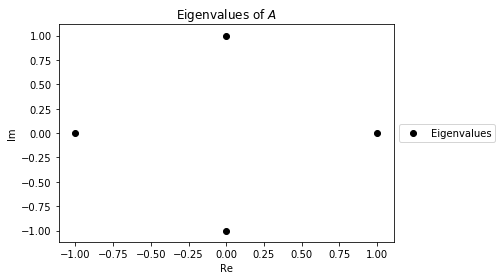

In [3]:
λs = eigvals(A)
eig_scatter = plt.scatter(λs.real, λs.imag, c="black")
plt.legend([eig_scatter], ['Eigenvalues'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Re")
plt.ylabel("Im")
plt.title("Eigenvalues of $A$");

Suppose we generate a Gaussian matrix $E$ and normalized it so $\widetilde{E} = \frac{E}{||E||}$. Below is a plot of the eigenvalues of $A$ and $A + \widetilde{E}$.

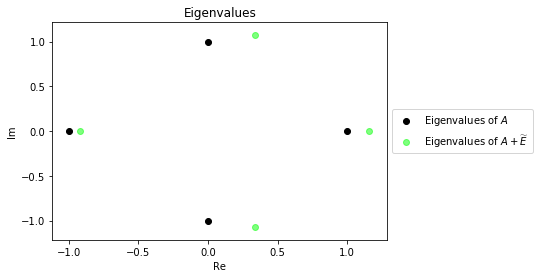

In [4]:
true_scatter = plt.scatter(λs.real, λs.imag, c="black")
noise = np.random.normal(size=[4,4])
A_prime = A + (noise/np.linalg.norm(noise, ord=2))
λs_prime = eigvals(A_prime)
noise_scatter = plt.scatter(λs_prime.real, λs_prime.imag, c="lime", alpha=.5)  
plt.legend((true_scatter, noise_scatter), ('Eigenvalues of $A$', 'Eigenvalues of $A + \widetilde{E}$'), 
           loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Re")
plt.ylabel("Im")
plt.title("Eigenvalues");

As we can see the eigenvalues don't stray too far from the original eigenvalues. This is an expected result from the Bauer-Fike theorem. Let's plot some more examples to get a better idea of how far the eigenvalues of $A$ with added noise tend to deviate from the original eigenvalues.

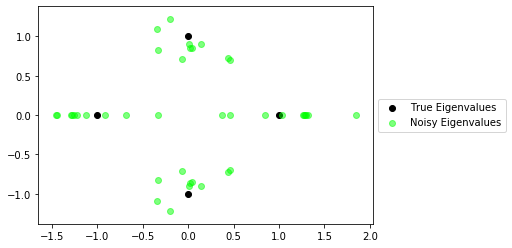

In [5]:
true_scatter = plt.scatter(λs.real, λs.imag, c="black")
for _ in range(10):
    noise = np.random.normal(size=[4,4])
    A_prime = A + (noise/np.linalg.norm(noise, ord=2))
    λs_prime = eigvals(A_prime)
    noise_scatter = plt.scatter(λs_prime.real, λs_prime.imag, c="lime", alpha=.5)
    
plt.legend((true_scatter, noise_scatter), ('True Eigenvalues', 'Noisy Eigenvalues'), loc='center left', bbox_to_anchor=(1, 0.5));

If we decrease the magnitude of the perturbation, we expect (by the Bauer-Fike theorem) that the eigenvalues from the noisy matricies to cluster closer to the original eigenvalues. We run this hypothesis below by plotting several samples of eigenvalues of $A + \gamma \widetilde{E}$ where $\gamma=\frac{1}{10}$.

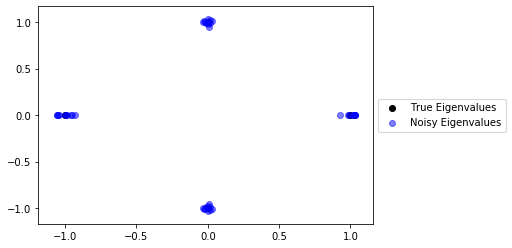

In [6]:
γ = 10**-1
true_scatter = plt.scatter(λs.real, λs.imag, c="black")
for _ in range(10):
    noise = np.random.normal(size=[4,4])
    A_prime = A + γ * (noise/np.linalg.norm(noise, ord=2))
    λs_prime = eigvals(A_prime)
    noise_scatter = plt.scatter(λs_prime.real, λs_prime.imag, c="blue", alpha=.5)
    
plt.legend((true_scatter, noise_scatter), ('True Eigenvalues', 'Noisy Eigenvalues'), loc='center left', bbox_to_anchor=(1, 0.5));

The eigenvalues from the noisy matricies are almost indistinguishable from the original eigenvalues. In the next section, we will define the Pseudospectrum of a matrix, which determines how far we can expect eigenvalues of a matrix will move when introduced to random noise.

# Definition of Pseudospectrum

The locus of the eigenvalues for a pertubed matrix can be calculated and is defined as the pseudospectrum for the unperturbed matrix. The formal definition is given below

<hr>

**Definition**: The $\epsilon$-pseudospectrum of a matrix, denoted $\Lambda_{\epsilon}(A)$, is defined as 

$$\Lambda_{\epsilon}(A) = \{\lambda \in \mathbb{C} | \exists v \notin \mathbb{C}\setminus \{ 0 \}, \exists E \in \mathbb{C}^{n \times n}: (A+E)v = \lambda v, ||E|| \leq \epsilon \}$$

<br>
<hr>

In words, the $\epsilon$-pseudospectrum is the set of all eigenvalues for matricies that are close enough to $A$ such that the norm of the difference between the matrix and $A$ is less than or equal to $\epsilon$.

# Visualizing the Pseudospectrum

There are already some existing libraries that can visualize the pseudospectrum of a matrix. We will be using Python's pseudopy package. 

In [9]:
from pseudopy import NonnormalMeshgrid

Continuing with the same matrix $A$ from the beginning of the section, let's plot the boundary of the $\epsilon$-pseudospectrum for $\epsilon = 10^{-1}$ and $\epsilon = 10^{0}$.

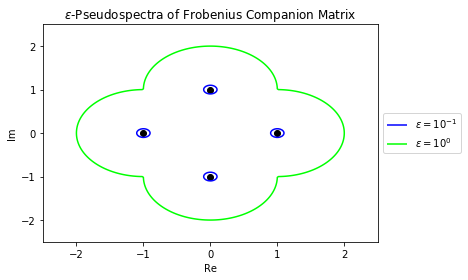

In [10]:
## Create Meshgrid
mesh = NonnormalMeshgrid(A, real_min=-2.5, real_max=2.5, imag_min=-2.5, imag_max=2.5, real_n=200, imag_n=200)

## Create Contours 
ϵs = [1e-1, 1]
colors = ["blue", "lime"]
contours = plt.contour(mesh.Real, mesh.Imag, mesh.Vals, levels=ϵs, colors=colors)

## Plot Eigenvalues
plt.scatter(λs.real, λs.imag, c="black")

## Create Legend 
legend_elements = contours.legend_elements()[0]
legend_names = ['$\epsilon=10^{-1}$','$\epsilon=10^{0}$']
plt.legend(legend_elements, legend_names, loc='center left', bbox_to_anchor=(1, 0.5))


## Label Plot
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.xlabel("Re")
plt.ylabel("Im")
plt.title("$\epsilon$-Pseudospectra of Frobenius Companion Matrix");

These boundaries represent the boundaries for the distribution of eigenvalues for the noisy matricies we plotted earlier in the chapter. Let's plot those points again to confirm that they are indeed contained within their respective pseudospectrum.

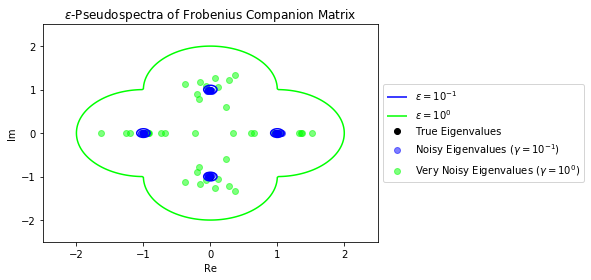

In [11]:
## Create Meshgrid
mesh = NonnormalMeshgrid(A, real_min=-2.5, real_max=2.5, imag_min=-2.5, imag_max=2.5, real_n=200, imag_n=200)

## Create Contours 
ϵs = [1e-1, 1]
colors = ["blue", "lime"]
contours = plt.contour(mesh.Real, mesh.Imag, mesh.Vals, levels=ϵs, colors=colors)

## Plot Eigenvalues of A
true_scatter = plt.scatter(λs.real, λs.imag, c="black")

## Plot Eigenvalues of A with noise
γ_1 = 10**0
for _ in range(10):
    noise = np.random.normal(size=[4,4])
    A_prime = A + γ_1 * (noise/np.linalg.norm(noise, ord=2))
    λs_prime = eigvals(A_prime)
    very_noisy_scatter = plt.scatter(λs_prime.real, λs_prime.imag, c="lime", alpha=.5)

## Plot Eigenvalues of A with small noise
γ_0 = 10**-1
for _ in range(10):
    noise = np.random.normal(size=[4,4])
    A_prime = A + γ_0 * (noise/np.linalg.norm(noise, ord=2))
    λs_prime = eigvals(A_prime)
    noisy_scatter = plt.scatter(λs_prime.real, λs_prime.imag, c="blue", alpha=.5)

## Create Legend 
scatter_plots = [true_scatter, noisy_scatter, very_noisy_scatter]
legend_elements = np.append(contours.legend_elements()[0], scatter_plots)
legend_names = ['$\epsilon=10^{-1}$','$\epsilon=10^{0}$', 
                'True Eigenvalues', 'Noisy Eigenvalues ($\gamma=10^{-1}$)', 
                'Very Noisy Eigenvalues ($\gamma=10^{0}$)']
plt.legend(legend_elements, legend_names, loc='center left', bbox_to_anchor=(1, 0.5))


## Label Plot
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.xlabel("Re")
plt.ylabel("Im")
plt.title("$\epsilon$-Pseudospectra of Frobenius Companion Matrix");

As expected, the eigenvalues of $A$ with some noise are contained within their respective pseudospectrum.

# Pseudospectrum of Normal Matrices

Note that our matrix is unitary (and thus normal).

In [12]:
A.T @ A

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [13]:
A @ A.T

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

It turns out that the pseudospectrum of normal matrices is always a union of disks. We will use the following lemma to prove this statement.

**Lemma:** $z \in \Lambda_{\epsilon}(A) \Leftrightarrow ||(z-A)^{-1}|| \geq \frac{1}{\epsilon}$

<hr>

**Theorem:** If $A$ is normal, then $\Lambda_{\epsilon}(A)$ is a union of disks with radius $\epsilon$ centered about its eigenvalues.

*Proof*: Suppose $A$ is normal and can be diagonlized with $A=UDU^*$ for $U$ unitary. Then 

$$||(z-A)^{-1}|| = ||(zUU^* - UDU^*)^{-1}|| = ||(U(z - D)U^*)^{-1}|| = ||U(z-D)^{-1}U^*||$$. 

Since since operator norm doesn't change when conjugated by a unitary, this equals $||(z-D)^{-1}||$. Note that $(z-D)^{-1}$ is a diagonal matrix where the $i$th diagonal is equal to $\frac{1}{z-\lambda_i}$. The operator norm of a diagonal matrix is equal to its greatest element, so

$$(z-D)^{-1} = \underset{k}{\max} |\frac{1}{z-\lambda_k}|$$. 

Note the $k$ that will maximize the expression is the one where $\lambda_k$ is closest to $z$. Let $\lambda_z$ be the closest eigenvalue to $z$. Thus, using the lemma, we know $z \in \Lambda_{\epsilon}(A) \Leftrightarrow |\frac{1}{z-\lambda_z}| \geq \frac{1}{\epsilon}$. This can be rewritten as $z \in \Lambda_{\epsilon}(A) \Leftrightarrow |z-\lambda_z| \leq \epsilon$.

Thus $z$ is in $\Lambda_{\epsilon}(A)$ if it is closer than $\epsilon$ to some eigenvalue. Since this is an if and only if condition, it is also the case that all values within $\epsilon$ of an eigenvalue is in $\Lambda_{\epsilon}(A)$. Thus $\Lambda_{\epsilon}(A)$ is a union of disks of radius $\epsilon$ centered at the eigenvalues.


<hr>